# Bike Sharing Assignment

## **Problem Statement**

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.They wants to know:
1) Which variables are significant in predicting the demand for shared bikes.
2) How well those variables describe the bike demands

## **Solution**

In [1]:
#importing EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data set and display top five rows.
df = pd.read_csv("./day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking shape of dataframe
df.shape

(730, 16)

In [4]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Handling and Cleaning

In [5]:
#dropping non required columns
non_required_cols = ['casual','registered', 'instant', 'dteday']
df = df.drop(columns=non_required_cols)
df.shape

(730, 12)

In [6]:
#Mapping season column to suitable category values
seasons = { 1:'spring', 2:'summer', 3:'fall',4:'winter'}
df['season'] = df['season'].apply(lambda x: seasons[x])
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [7]:
#Mapping weathersit column to suitable category values
weathersits = { 1:'Clear', 2:'Mist', 3:'Snow',4:'Rain'}
df['weathersit'] = df['weathersit'].apply(lambda x: weathersits[x])
df['weathersit'].value_counts()

Clear    463
Mist     246
Snow      21
Name: weathersit, dtype: int64

In [8]:
#Mapping month column to suitable category values
months = { 1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['mnth'] = df['mnth'].apply(lambda x: months[x])
df['mnth'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [9]:
#Mapping weekday column to suitable category values
weekdays = { 0:'Mon', 1:'Tue', 2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'}
df['weekday'] = df['weekday'].apply(lambda x: weekdays[x])
df['weekday'].value_counts()

Sun    105
Mon    105
Tue    105
Wed    104
Fri    104
Sat    104
Thr    103
Name: weekday, dtype: int64

In [10]:
#segrating columns on types
cont_cols = ['temp','atemp','hum','windspeed','cnt']
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

### Performing EDA

### Univariat Analysis

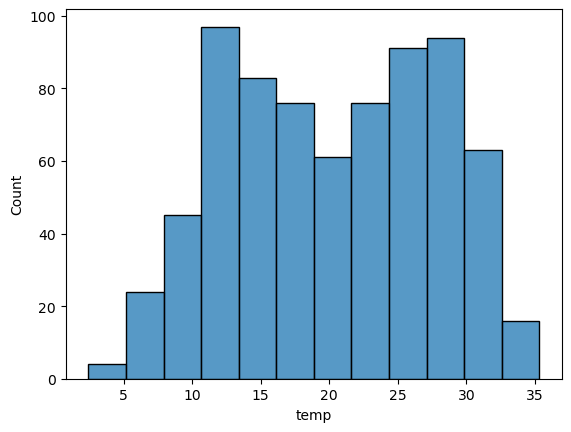

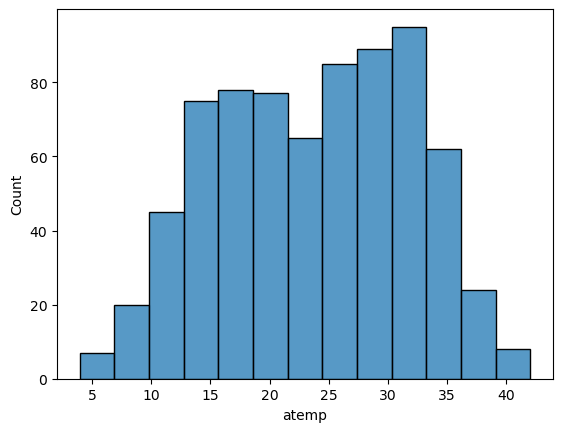

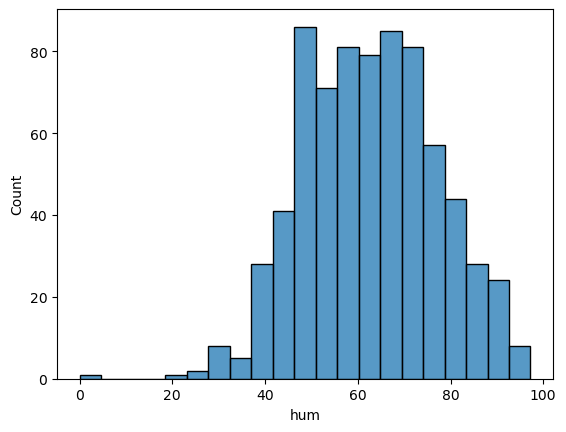

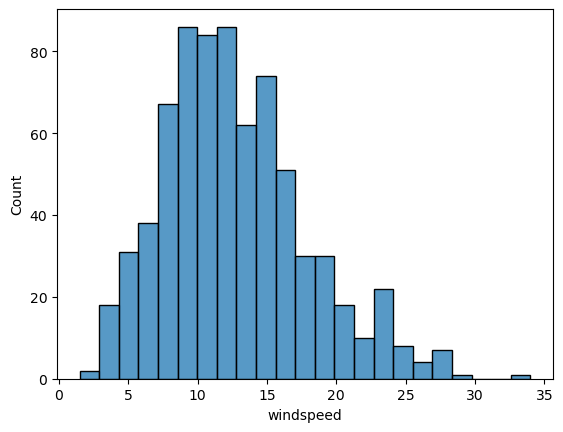

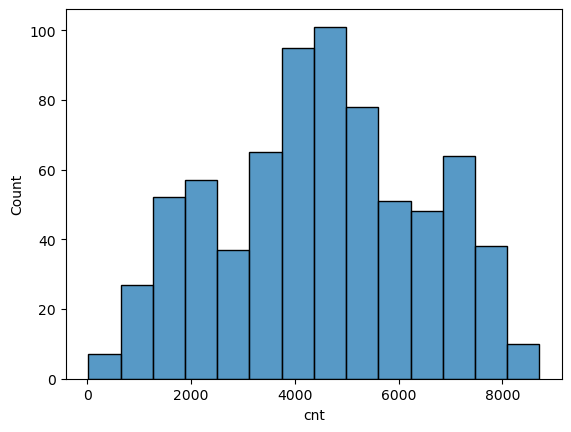

In [11]:
#ploting histogram against all quantitative columns for univariate analysis
for col in cont_cols:
    sns.histplot(x=df[col])
    plt.show()

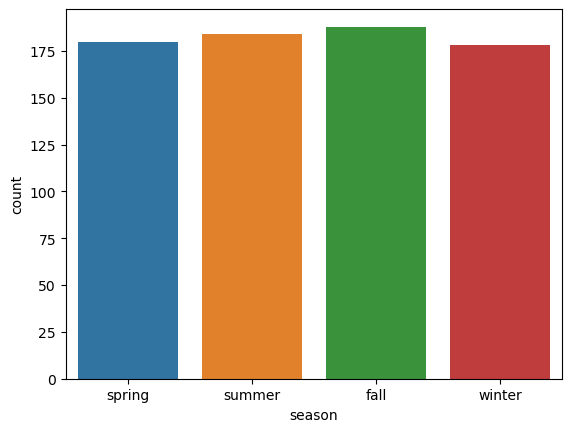

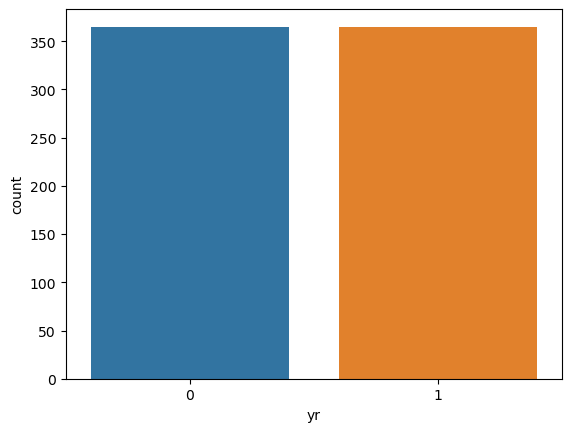

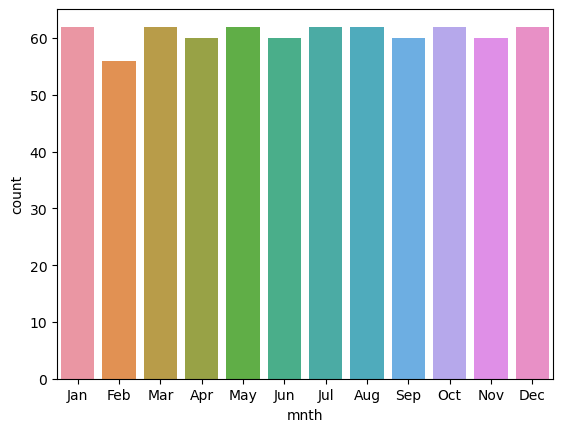

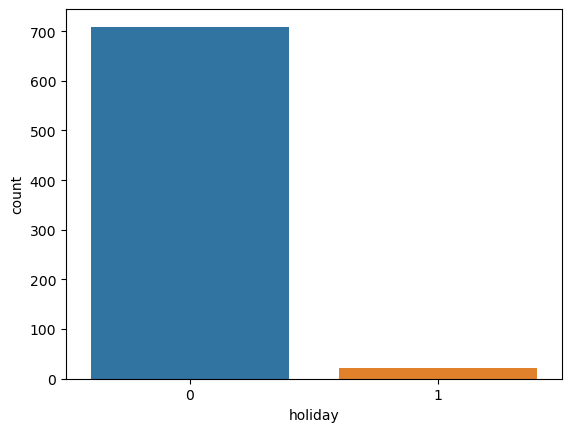

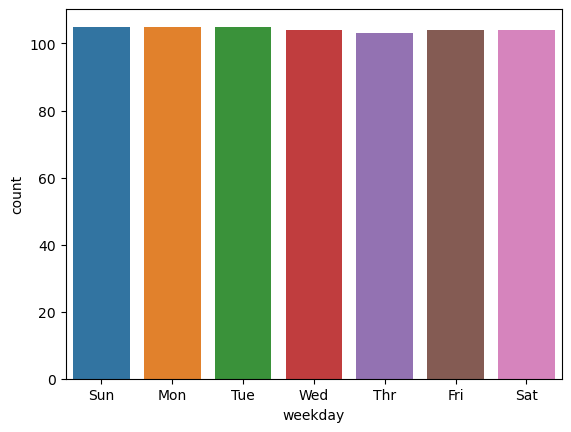

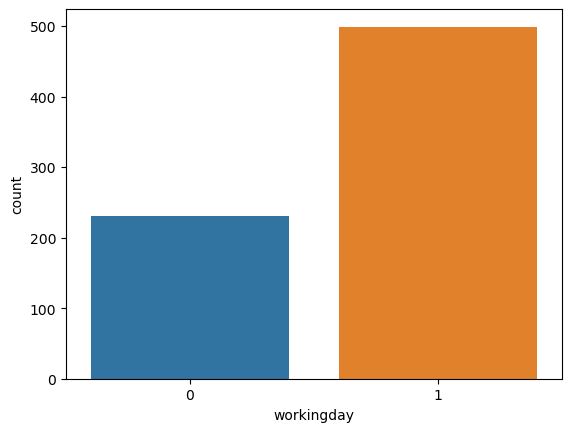

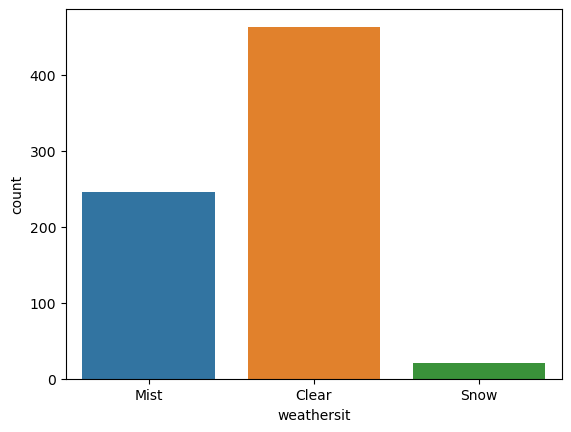

In [12]:
#ploting count plot against all categorical columns for univariate analysis
for cat in cat_cols:
    sns.countplot(x=df[cat])
    plt.show()

### Bivariate Analysis

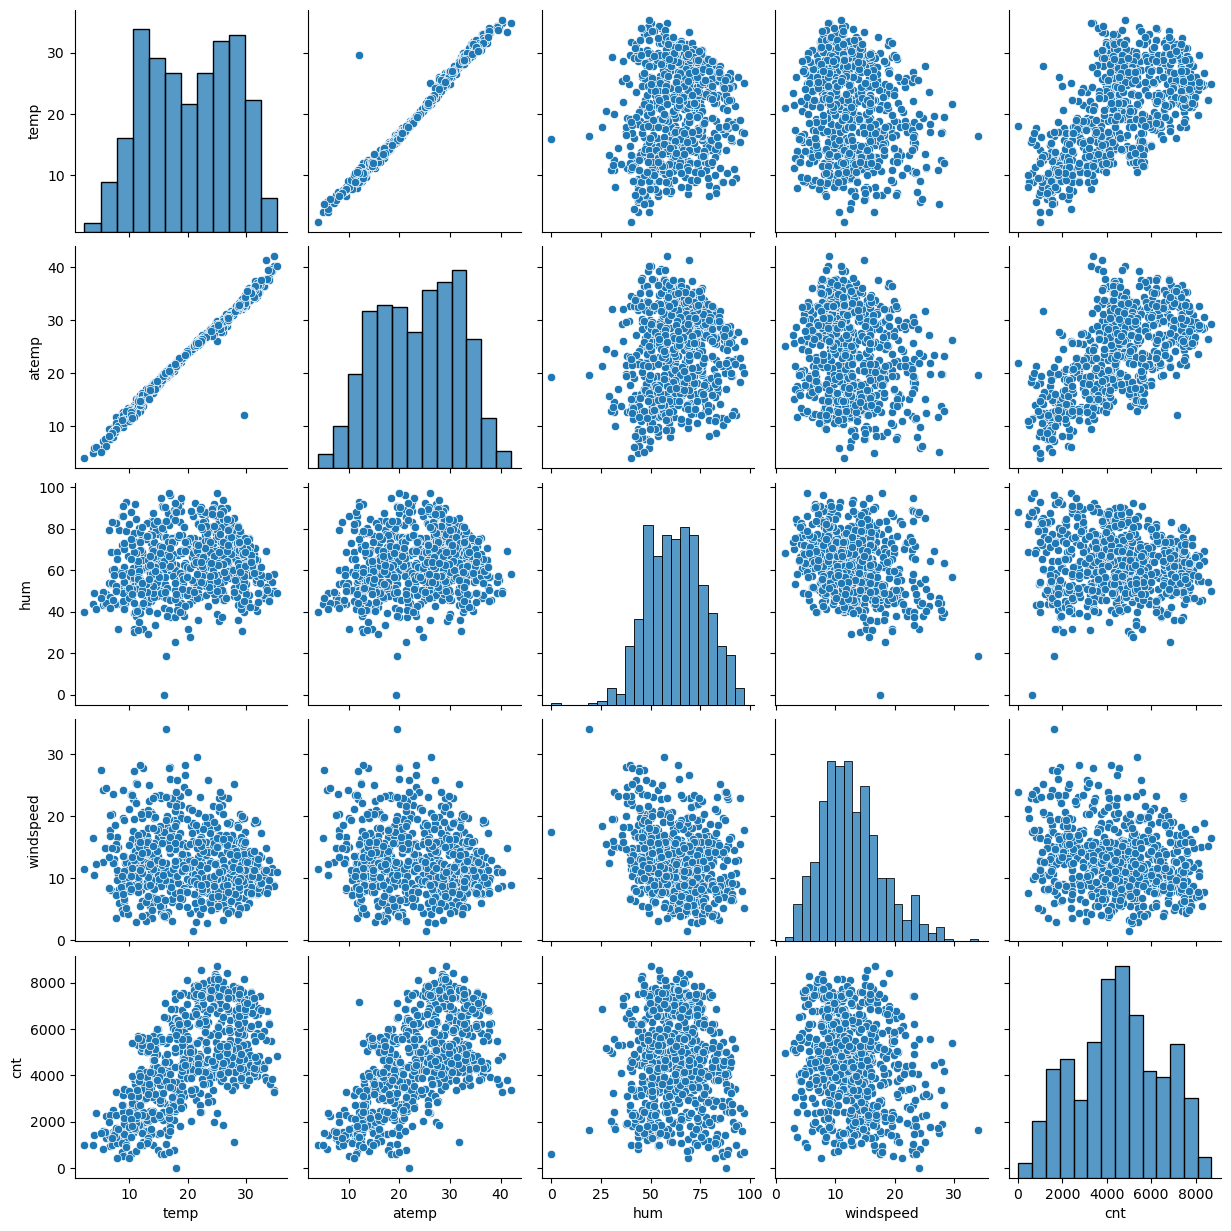

In [13]:
#ploting pair plot against all quantative columns for bivariate analysis
sns.pairplot(df[cont_cols])
plt.show()

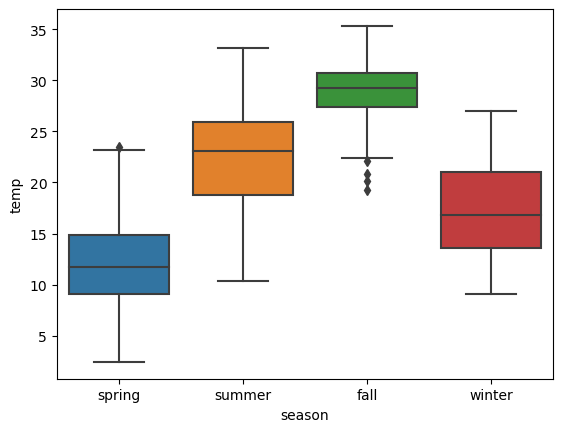

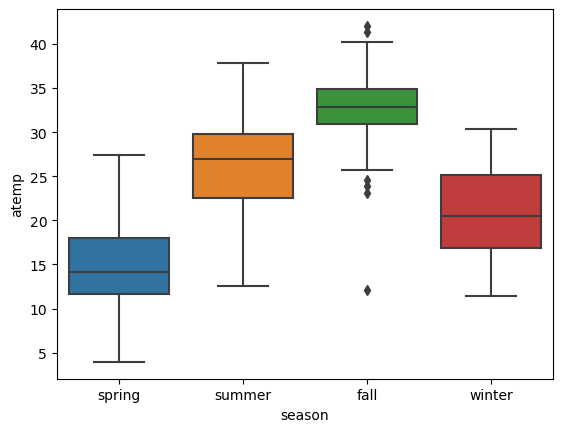

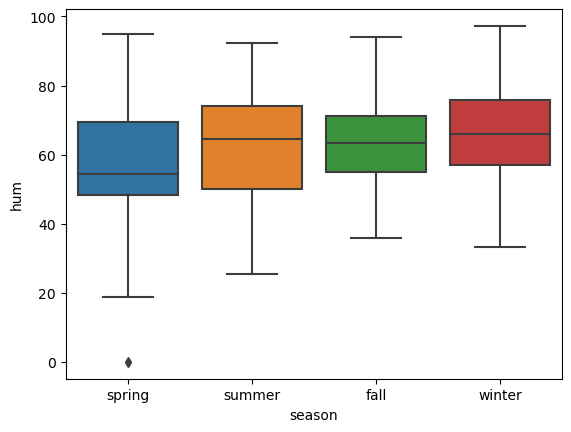

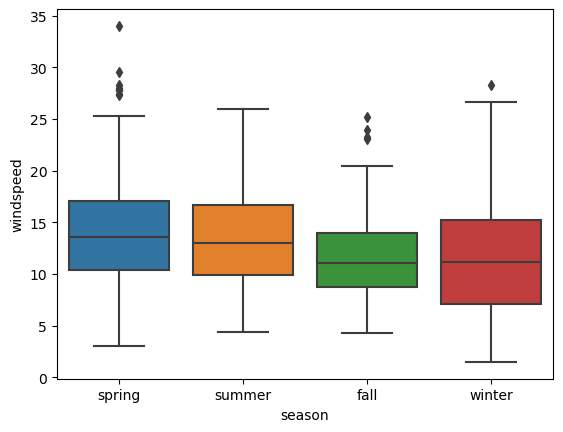

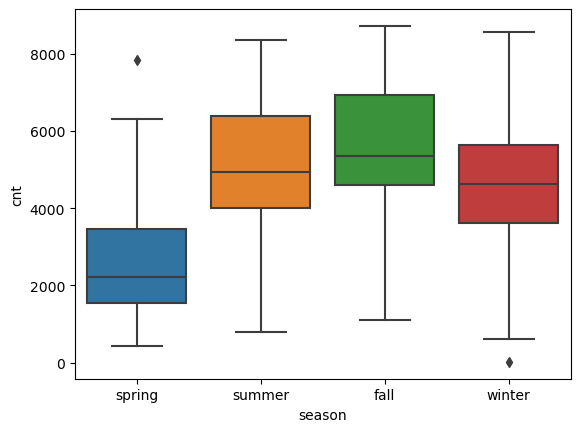

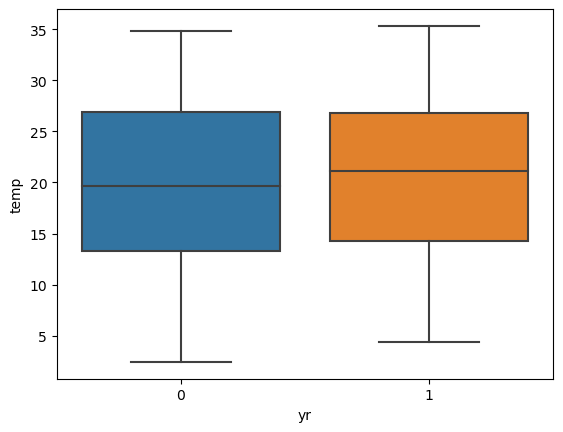

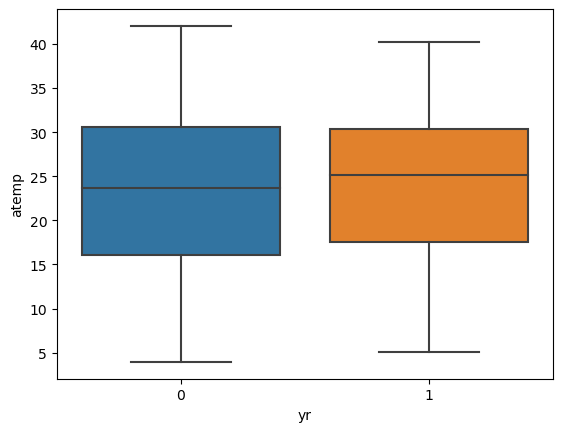

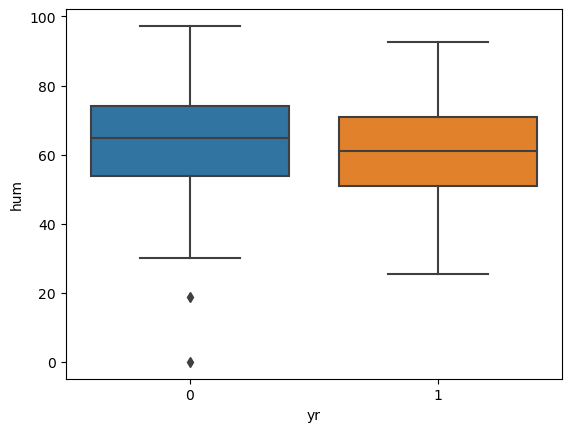

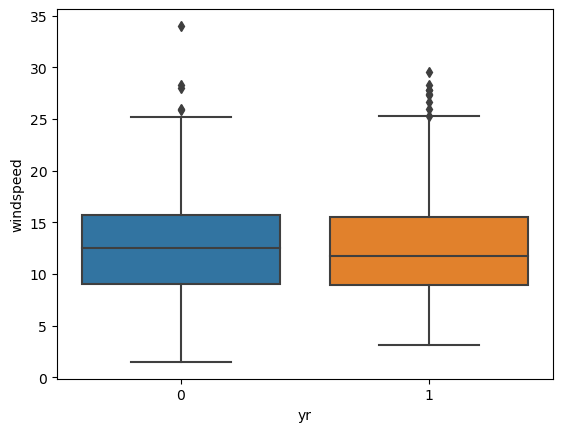

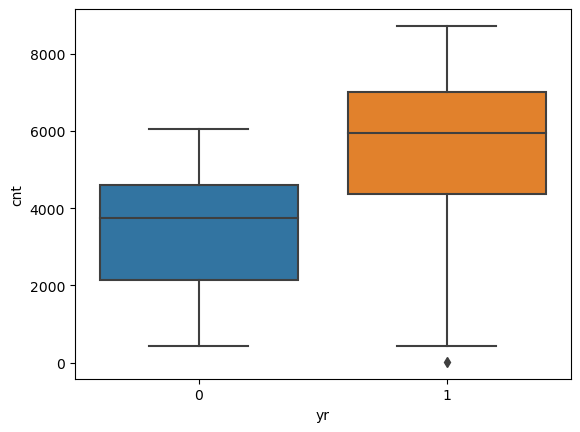

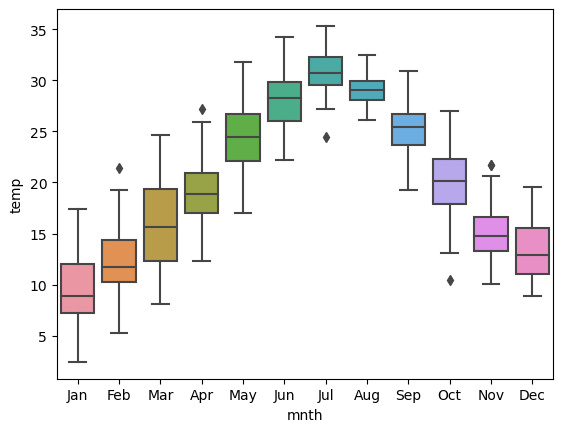

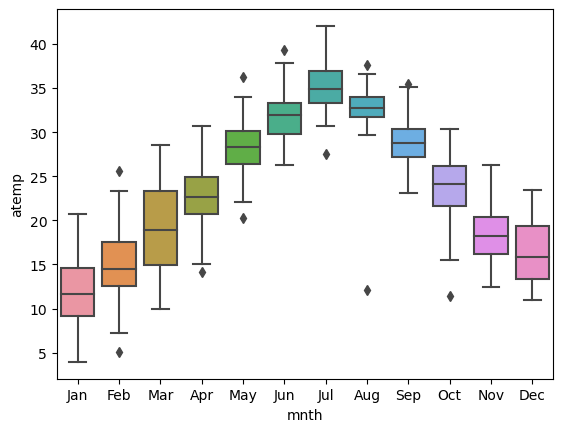

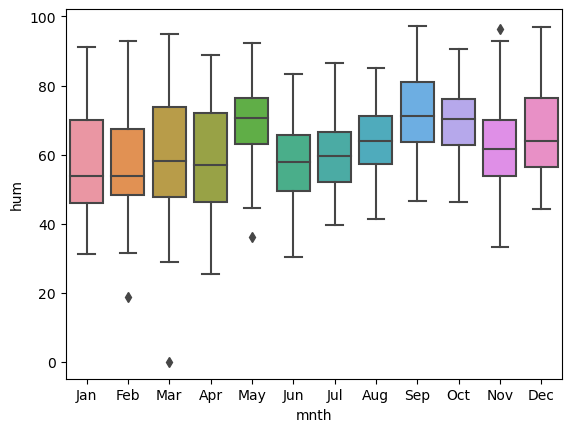

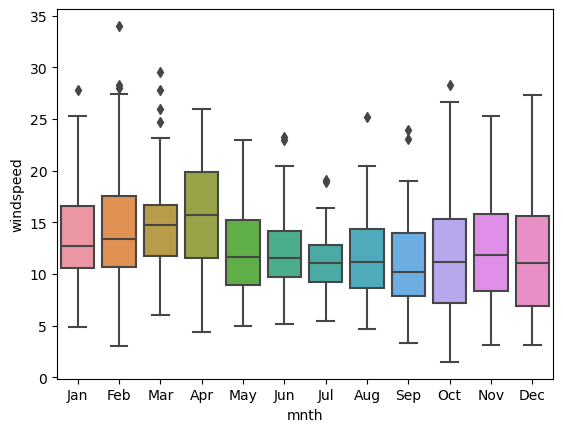

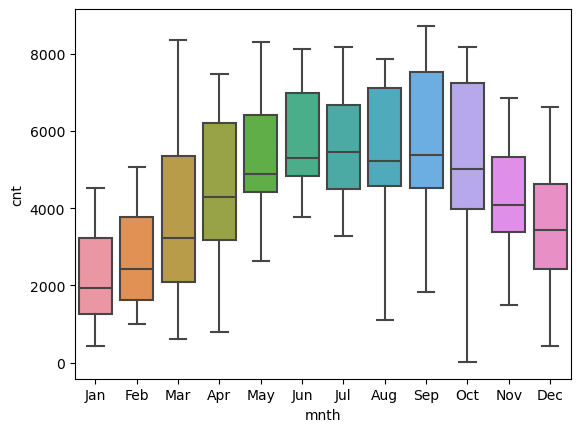

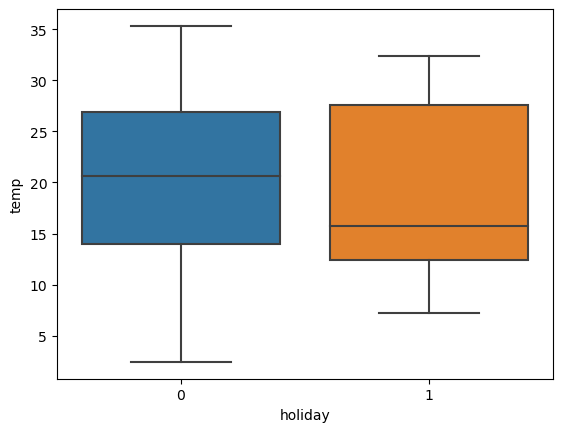

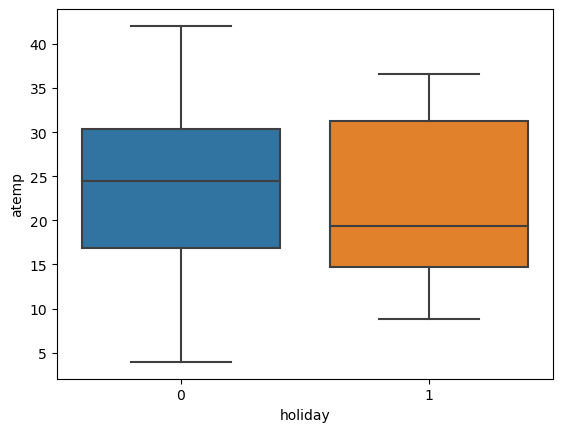

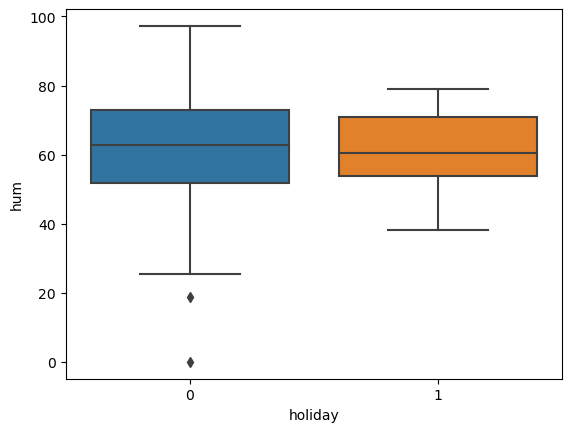

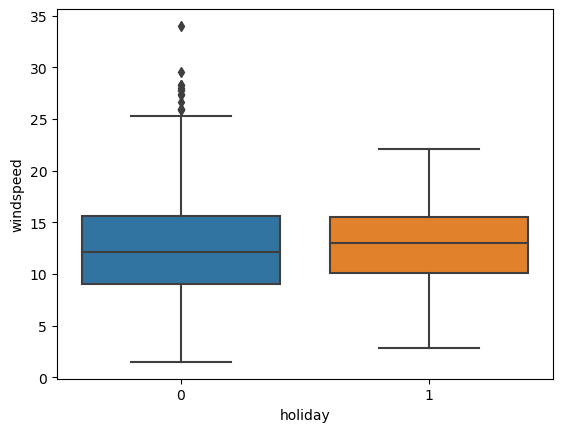

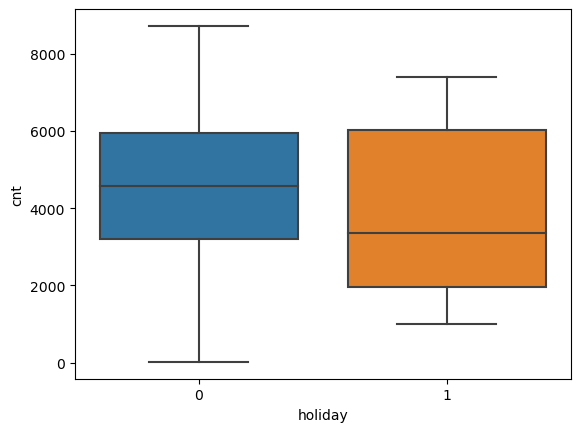

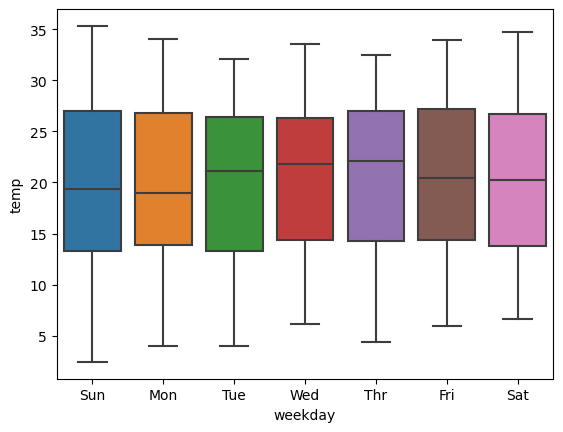

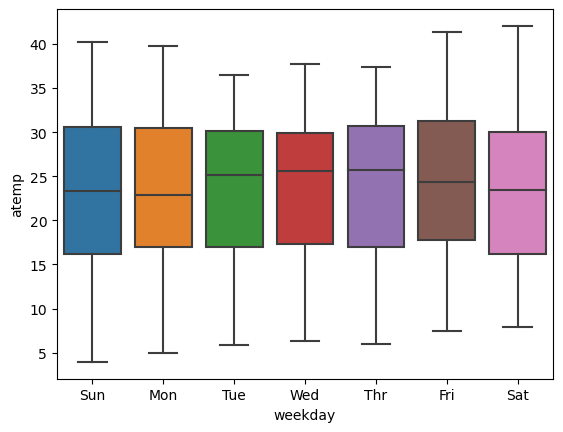

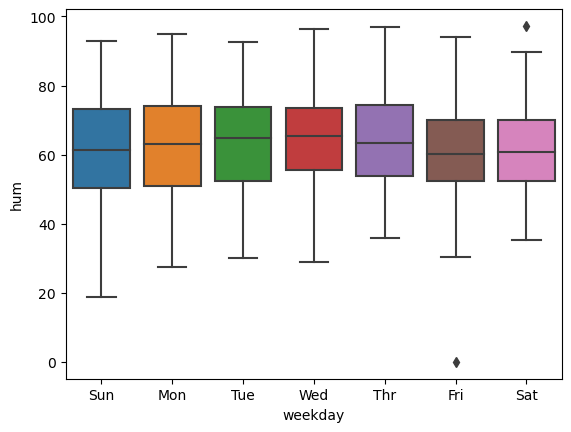

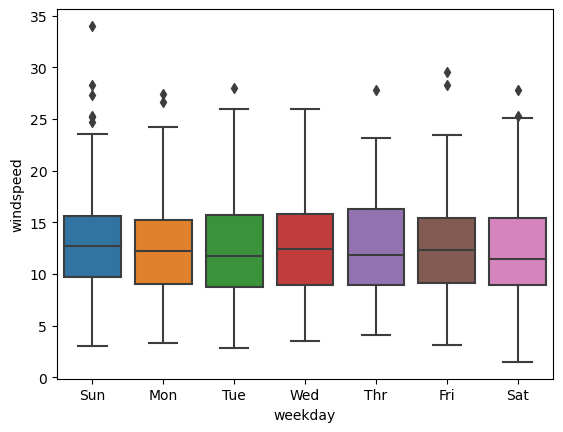

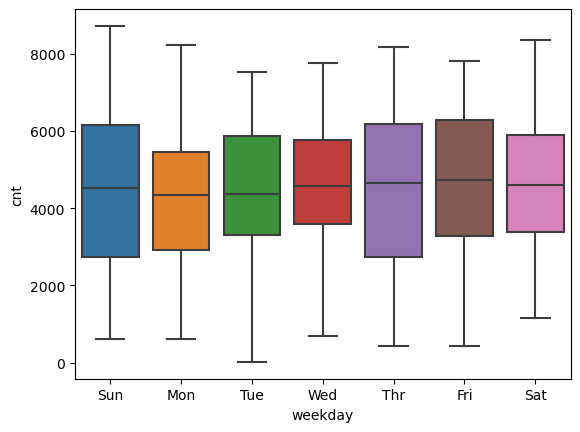

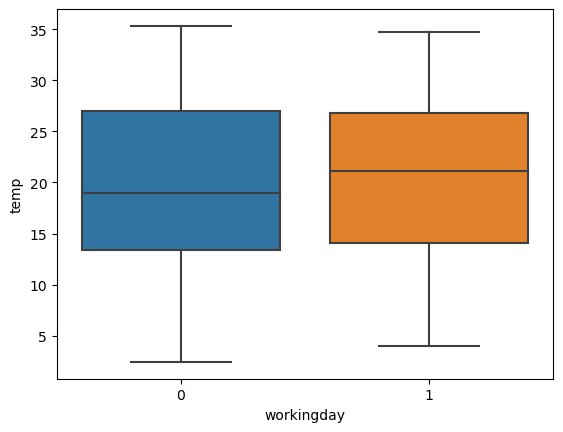

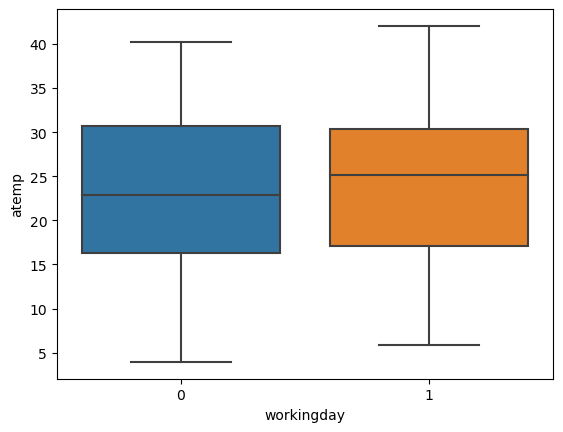

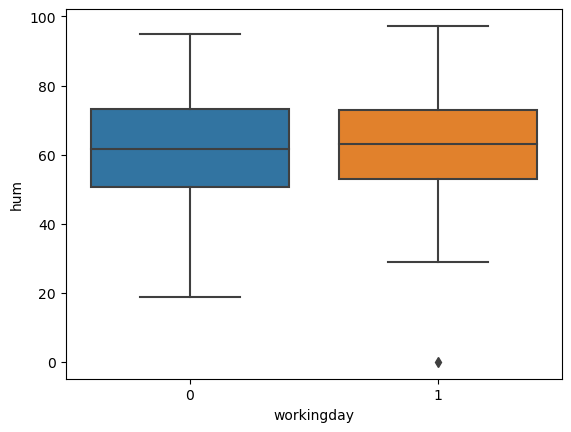

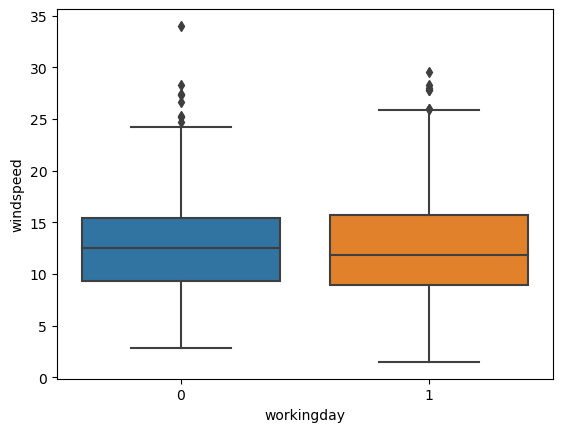

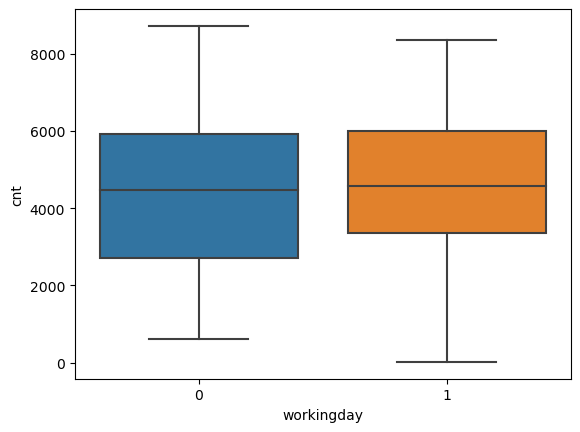

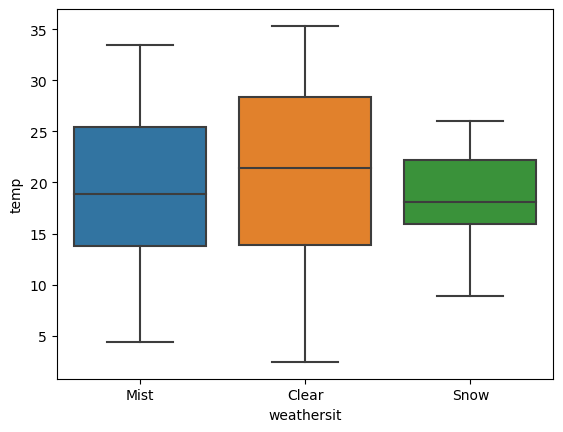

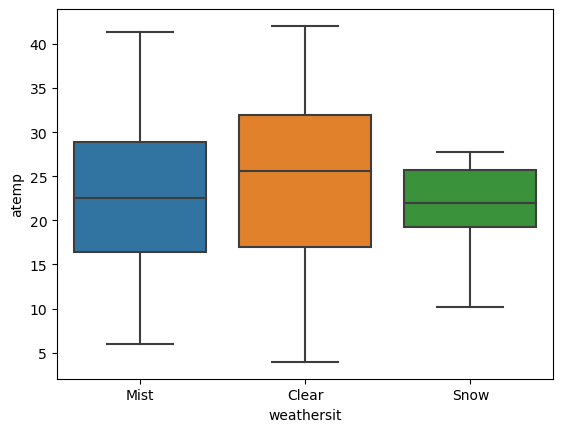

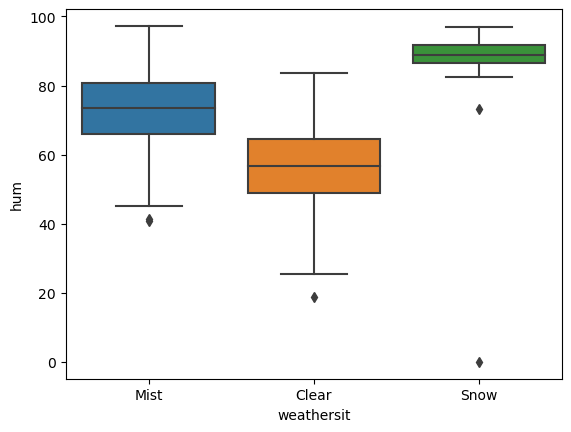

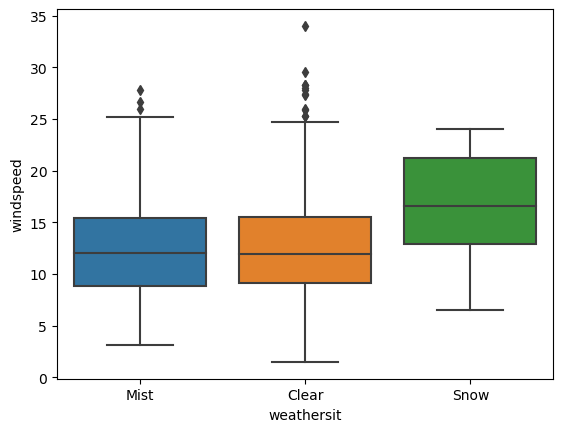

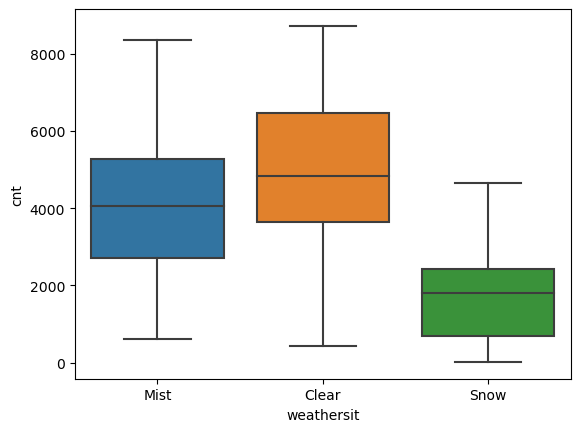

In [14]:
#ploting box plot showing result for each categorical column against each quantative column 
#for bivariate analysis
for col1 in cat_cols:
    for col2 in cont_cols:
        sns.boxplot(x=df[col1], y=df[col2])
        plt.show()

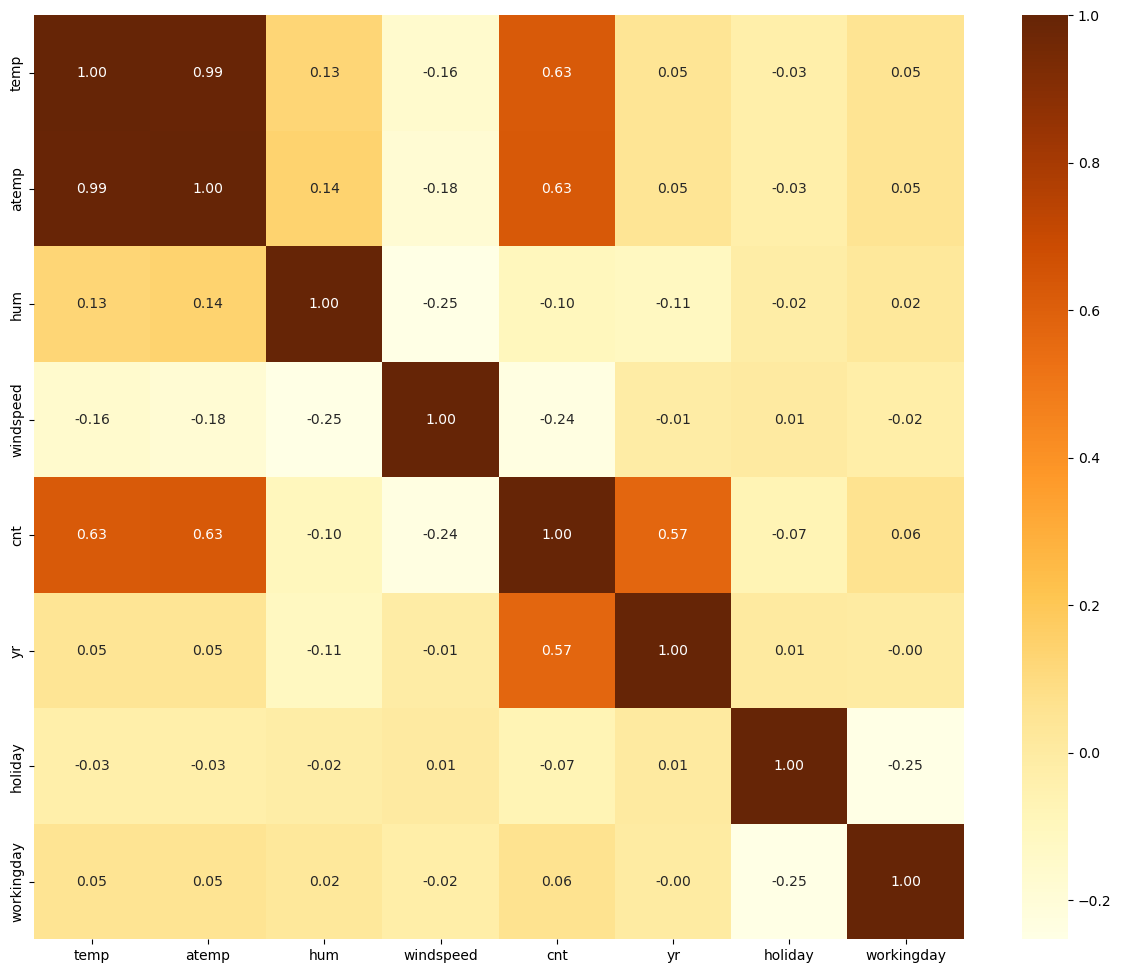

In [15]:
#ploting heat map showing corelation between different columns for bivariate analysis
hm_df = df[cont_cols + cat_cols]
plt.figure(figsize=(15,12))
sns.heatmap(hm_df.corr(), annot=True, fmt='.2f', cmap="YlOrBr")
plt.show()

### Creating Dummy columns

In [16]:
#dummy columns creations
dum_df = pd.get_dummies(df, columns=['season','yr','mnth','weekday','weathersit'], drop_first=True)
dum_df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [17]:
#import spliting library
from sklearn.model_selection import train_test_split

In [18]:
#Spliting data set
df_train, df_test = train_test_split(dum_df, train_size=0.7, test_size=0.3, random_state=100)
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
653,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Rescaling the Features

In [19]:
#importing library for minmax scaling
from sklearn.preprocessing import MinMaxScaler

In [20]:
#performing min max scaling
scaler = MinMaxScaler()
df_train[cont_cols] = scaler.fit_transform(df_train[cont_cols])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Dividing into X and Y sets for the model building

In [21]:
y_train = df_train.pop('cnt')
x_train = df_train

## Building our model

### Feature selection

In [22]:
#importing libraries for linear regreation and recurrsive feature elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [23]:
#running linear regression and RFE with output variables upto 10
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(x_train, y_train)

In [24]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', False, 5),
 ('yr_1', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 8),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 19),
 ('mnth_Mar', False, 20),
 ('mnth_May', False, 12),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 17),
 ('mnth_Sep', False, 4),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 16),
 ('weekday_Sun', True, 1),
 ('weekday_Thr', False, 18),
 ('weekday_Tue', False, 14),
 ('weekday_Wed', False, 15),
 ('weathersit_Mist', False, 3),
 ('weathersit_Snow', True, 1)]

In [25]:
selected_features = x_train.columns[rfe.support_]
print(selected_features)

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'yr_1', 'weekday_Mon', 'weekday_Sun', 'weathersit_Snow'],
      dtype='object')


### Performing detailed statistics using statsmodel

In [26]:
#importing statsmodel library
import statsmodels.api as sm

In [27]:
#creating dataset using RFE selected variables
x_rfe_train = x_train[selected_features]

In [28]:
#adding constant
x_rfe_train = sm.add_constant(x_rfe_train)

In [29]:
#running linear model
lm_stat = sm.OLS(y_train, x_rfe_train).fit()

In [30]:
#displaying summary
print(lm_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.40e-174
Time:                        21:53:58   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     500   BIC:                            -864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3308      0.024     

In [31]:
#import library for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
#calculating VIF for model
vif = pd.DataFrame()
vif['Features'] = x_rfe_train.columns
vif['VIF'] = [variance_inflation_factor(x_rfe_train.values, i) for i in range(len(x_rfe_train.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
8,weekday_Mon,inf
9,weekday_Sun,inf
3,temp,1.63
6,season_spring,1.62
4,hum,1.21
5,windspeed,1.14
10,weathersit_Snow,1.10
7,yr_1,1.03


In [33]:
#removing holiday variable because of VIF = infinite
x_rfe_train = x_rfe_train.drop(columns=['holiday'])

In [34]:
#re-building model
lm_stat = sm.OLS(y_train, x_rfe_train).fit()

In [35]:
#print summary
print(lm_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.40e-174
Time:                        21:54:03   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     500   BIC:                            -864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3620      0.040     

In [36]:
#re-calculating VIF for model
vif = pd.DataFrame()
vif['Features'] = x_rfe_train.columns
vif['VIF'] = [variance_inflation_factor(x_rfe_train.values, i) for i in range(len(x_rfe_train.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.73
1,workingday,8.97
8,weekday_Sun,6.00
7,weekday_Mon,5.69
2,temp,1.63
5,season_spring,1.62
3,hum,1.21
4,windspeed,1.14
9,weathersit_Snow,1.10
6,yr_1,1.03


In [37]:
#removing workingday variable because of VIF > 5
x_rfe_train = x_rfe_train.drop(columns=['workingday'])

In [38]:
#re-building model
lm_stat = sm.OLS(y_train, x_rfe_train).fit()

In [39]:
#print summary
print(lm_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     263.6
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          4.06e-174
Time:                        21:54:09   Log-Likelihood:                 459.35
No. Observations:                 510   AIC:                            -900.7
Df Residuals:                     501   BIC:                            -862.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4351      0.030     

In [40]:
#re-calculating VIF for model
vif = pd.DataFrame()
vif['Features'] = x_rfe_train.columns
vif['VIF'] = [variance_inflation_factor(x_rfe_train.values, i) for i in range(len(x_rfe_train.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.02
1,temp,1.63
4,season_spring,1.62
2,hum,1.21
3,windspeed,1.14
8,weathersit_Snow,1.10
7,weekday_Sun,1.04
5,yr_1,1.03
6,weekday_Mon,1.03


In [41]:
#removing weekday_Sun variable because of P > .05
x_rfe_train = x_rfe_train.drop(columns=['weekday_Sun'])

In [42]:
#re-building model
lm_stat = sm.OLS(y_train, x_rfe_train).fit()

In [43]:
#print summary
print(lm_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     301.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          3.73e-175
Time:                        21:54:14   Log-Likelihood:                 458.84
No. Observations:                 510   AIC:                            -901.7
Df Residuals:                     502   BIC:                            -867.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4383      0.030     

In [44]:
#re-calculating VIF for model
vif = pd.DataFrame()
vif['Features'] = x_rfe_train.columns
vif['VIF'] = [variance_inflation_factor(x_rfe_train.values, i) for i in range(len(x_rfe_train.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.50
1,temp,1.63
4,season_spring,1.62
2,hum,1.21
3,windspeed,1.13
7,weathersit_Snow,1.10
5,yr_1,1.02
6,weekday_Mon,1.00


### Residual Analysis of the train data

In [45]:
#predicting on train data
y_train_cnt = lm_stat.predict(x_rfe_train)

Text(0.5, 0, 'Errors')

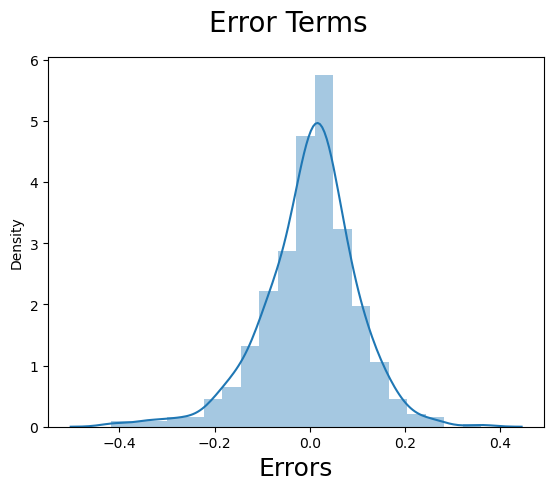

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [47]:
df_test[cont_cols] = scaler.transform(df_test[cont_cols])

#### Dividing into X_test and y_test

In [48]:
y_test = df_test.pop('cnt')
x_test = df_test

In [49]:
#creating dataset on basis of selected features
x_test_new = x_test[selected_features]

In [50]:
#removing working variable because of VIF = infinite
x_test_new = x_test_new.drop(columns=['holiday', 'workingday', 'weekday_Sun'])

In [51]:
#adding constant
x_test_new = sm.add_constant(x_test_new)

In [52]:
#making prediction
y_pred = lm_stat.predict(x_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

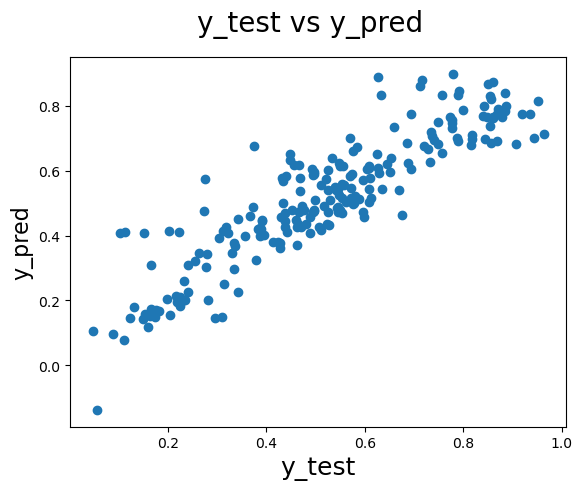

In [53]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [54]:
#calculating r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7974972069913184